<a href="https://colab.research.google.com/github/YooNayoung/ESAA/blob/main/PART3_Keras(1~4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01. 딥러닝 준비** 

## **1-1. 주요 용어**

### 1-1-1. 하이퍼파라미터(hyper-parameter)
- 사용자가 직접 설정해주는 설정 값 
- 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라짐 
- tuning: 하이퍼파라미터의 값을 조절하는 행위 

### 1-1-2. 과소적합 vs 과대적합(underfitting vs overfitting)
- 과소적합: 모델이 충분히 학습되지 않아 예측 성능이 떨어지는 상태
- 과대적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태. 훈련 데이터에 대한 예측 성능은 좋지만 정작 중요한 예측 데이터에 대한 예측 오차가 발생할 확률이 커짐.
- 모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서도 정확도를 가장 높일 수 있도록 해야 함. 
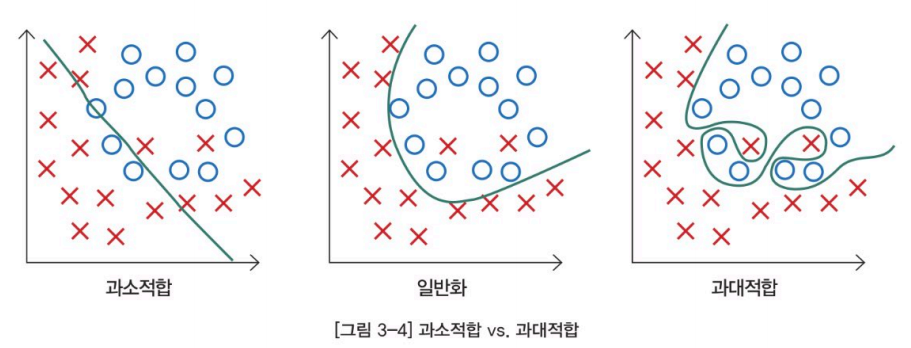

### 1-1-3. 에포크(epoch)
- 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회 훈련 루프를 1 epoch라 함
- 사전에 설정된 최대 epoch 횟수까지 반복적으로 진행하고 종료함
- (Tip) 최대 epoch까지 반복 학습이 끝나더라도 모델이 과소적합 되었다고 판단되면 epoch를 늘려 다시 학습할 필요가 있음. 반대로 과대적합 구간으로 진입한다면 epoch를 줄여 최적 구간에서 학습을 조기 종료함.  

### 1-1-4. 손실함수(loss function)
- '예측 값과 정답 값의 차이 또는 오차'
- 손실함수는 분류나 회귀 모델에 따라 사용자가 직접 정의해야 함
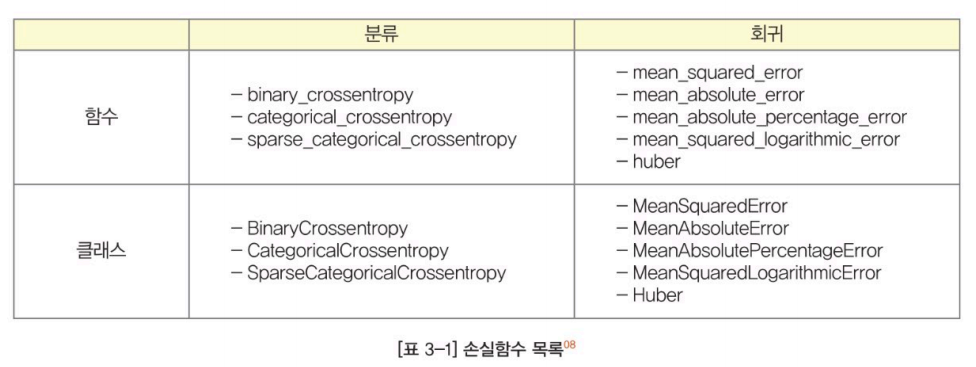

In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수 
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy>

### 1-1-5. 경사하강법(gradient descent)
- 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법
- 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있음
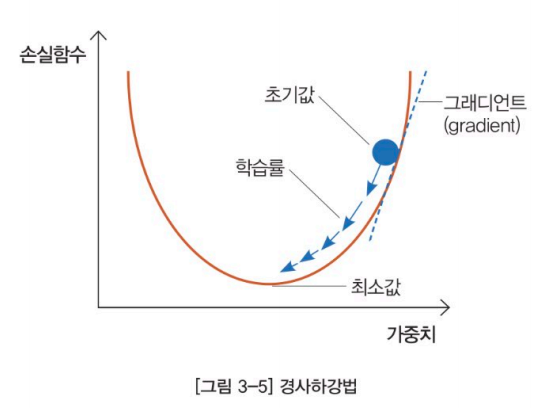

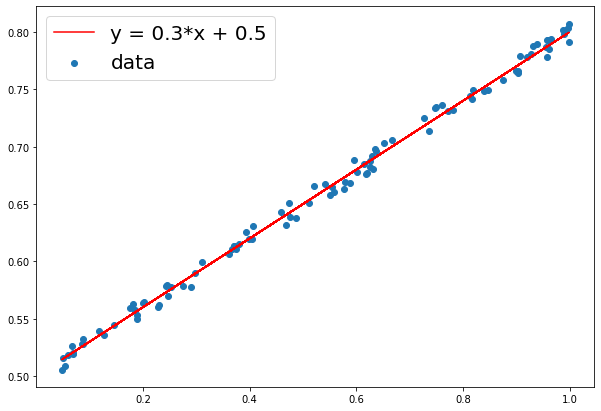

w: 0.3, b: 0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.36775, b = 0.47765 error = 0.12871
 5 w = 0.35112, b = 0.47102 error = 0.01399
10 w = 0.34302, b = 0.47561 error = 0.01032
15 w = 0.33625, b = 0.47951 error = 0.00774
20 w = 0.33058, b = 0.48278 error = 0.00593
------------------------------------------------------------
24 w = 0.3, b = 0.5 error = 0.00487


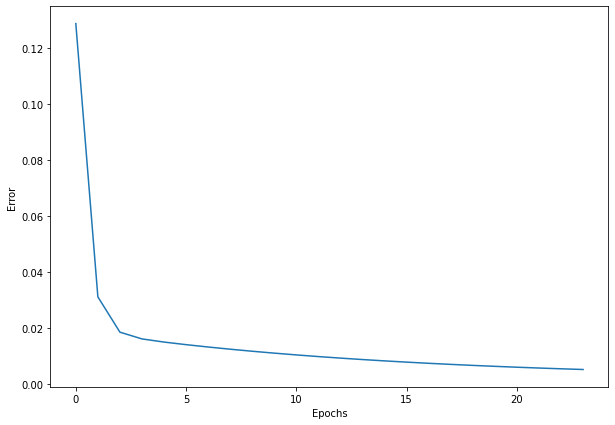

In [4]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## **1-2. 딥러닝 프로세스** 
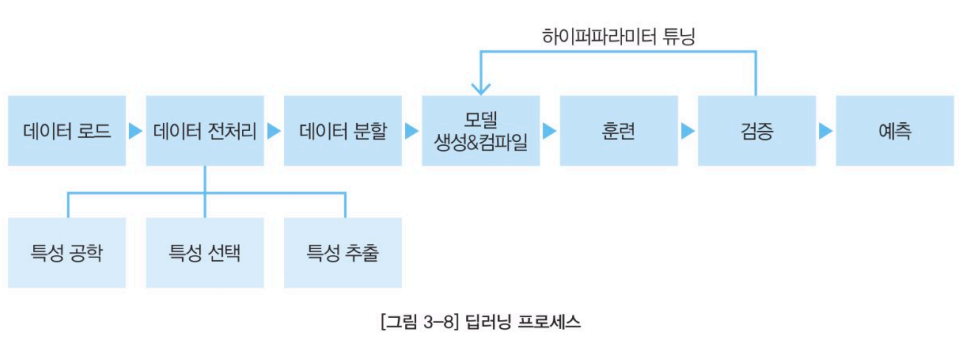

### 1-2-1. 데이터 전처리
- 데이터를 모델에 주입하기 전 데이터를 가공하는 단계
- 전처리 단계에서 데이터셋의 형태나 차원을 미리 구상해야 다음 단계에서 모델을 설계할 때 입력할 데이터셋의 형태를 올바르게 정의할 수 있음

### 1-2-2. 모델 생성
- 모델의 구조를 정의하고 생성하는 단계
- Sequential API: 순차적인 구조의 모델
- Functional API or Model Subclassing: 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델 

### 1-2-3. 모델 컴파일
- 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의
- 모델 인스턴스에 compile() 메소드를 적용하고, 앞에서 열거한 여러 가지 속성 값을 설정 

### 1-2-4. 모델 훈련
- 모델을 훈련하는 단계
- fit() 함수에 모델 훈련에 필요한 정보를 매개변수로 전달
- 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등을 지정 

### 1-2-5. 모델 검증
- 훈련이 완료된 모델을 검정하는 단계 
- 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산함
- 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이뤄짐
- 목표 성능에 도달할 때까지 앞 과정 반복 

### 1-2-6. 모델 예측
- 훈련과 검증이 완료된 모델로 테스트셋에 대하여 예측하고 그 결과를 반환

# **02. 단순 신경망 훈련** 

## **2-1. 선형회귀**
- y = wx + b
- w와 b를 업데이트하면서 y에 가장 근사한 1차 함수식을 완성해 나감
- w는 가중치, b는 편향 

## **2-2. 뉴런(Neuron)**
- 인공 신경망 모델을 구성하는 하나의 신경
- 신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨
- 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨

## **2-3. Dense 레이어**
- 심층 신경망 모델을 구성하는 가장 기본 레이어
- 노드 개수와 활성화 함수를 지정할 수 있음

In [5]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

## **2-4. 데이터셋 만들기** 

In [6]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


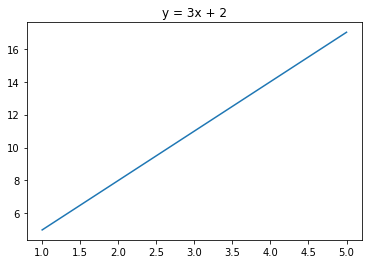

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

## **2-5. Sequential API**
- 모델 생성 방식 중 하나로 가장 간단
- 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식으로 입력 레이어부터 출력 레이어까지 순서를 가짐
- 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산 수행
- 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조는 만들 수 없음
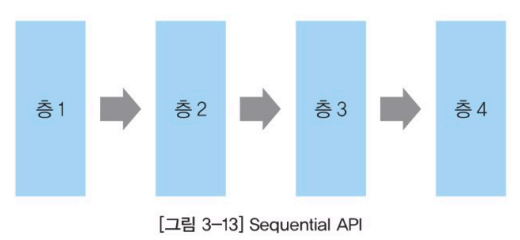

### 2-5-1. 모델 구조


In [8]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [9]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### 2-5-2. 입력 데이터 형태


In [10]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정 
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

### 2-5-3. 단순성형회귀 모델 정의


In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

## **2-6. 모델 요약**

In [12]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## **2-7. 컴파일**

In [13]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [14]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [15]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## **2-8. 훈련**


In [17]:
# 훈련
history = model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 973ms/step - loss: 158.4820 - mae: 11.7246
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 92.4338 - mae: 8.9907
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 53.9436 - mae: 6.9036
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 31.5129 - mae: 5.3101
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 18.4409 - mae: 4.0936


In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

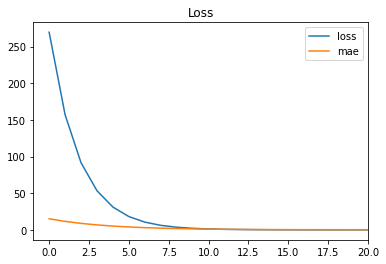

In [19]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

## **2-9. 검증**


In [20]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 281ms/step - loss: 2.8341e-05 - mae: 0.0046


[2.834129918483086e-05, 0.004569339565932751]

## **2-10. 예측**

In [21]:
# 예측
model.predict([10])

array([[32.022083]], dtype=float32)

# **03. 심층 신경망으로 이미지 분류**

## **3-1. 케라스 내장 데이터셋 로드**


In [22]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [23]:
# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [24]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


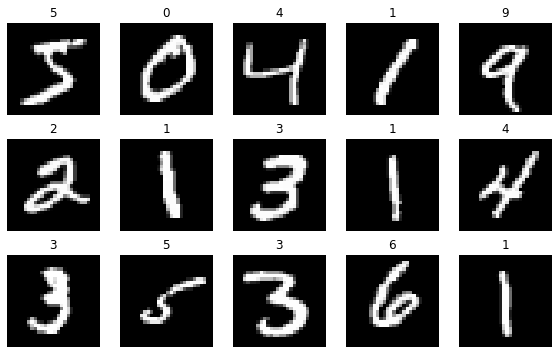

In [25]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

## **3-2. 데이터 전처리**

In [26]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [27]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [28]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [29]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

## **3-3. Flatten 레이어**
다차원 데이터를 1차원으로 펼쳐줌

In [30]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [31]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


## **3-4. 활성화 함수**
- 입력을 비선형 출력으로 변환해주는 함수
- Sigmoid, Hyperbolic Tangent, ReLU, Leaky ReLU

In [32]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [33]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

## **3-5. 입력과 출력** 

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

In [35]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

## **3-6. 손실함수**
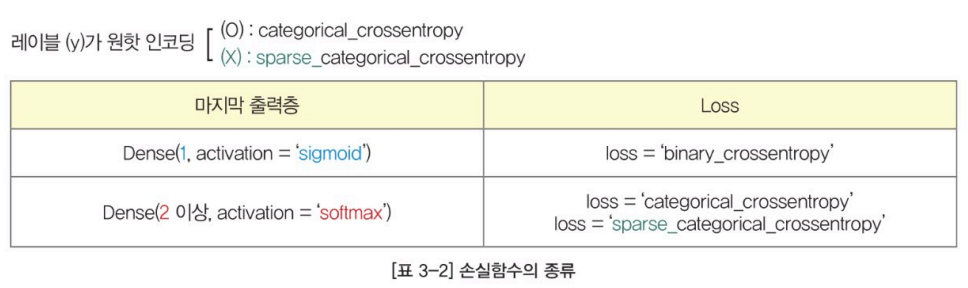

In [36]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [37]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

## **3-7. 옵티마이저**
- 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법 
- 일반적으로 많이 사용되는 알고리즘은 Adam

In [38]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## **3-8. 평가지표**
- 정확도를 나타내는 'accuracy'가 가장 많이 사용됨
- 이 외에도 'auc', 'precision', 'recall' 등이 있음

In [39]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [40]:
# 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## **3-9. 훈련**

In [41]:
# 훈련
model.fit(x_train, y_train, 
          # 검증셋 지정
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2213 - accuracy: 0.9338 - val_loss: 0.1076 - val_accuracy: 0.9682
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0942 - accuracy: 0.9711 - val_loss: 0.0849 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0651 - accuracy: 0.9793 - val_loss: 0.0698 - val_accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0732 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.0759 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0852 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0283 - accuracy: 0.9907 - val_loss: 0.0842 - val_accurac

## **3-10. 평가**

In [43]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9804
검증셋 정확도: 0.980400025844574


## **3-11. 예측**

In [44]:
# 예측
predictions = model.predict(x_test)

In [45]:
# 예측 결과 출력
predictions[0]

array([1.6039869e-11, 2.1808054e-10, 2.9257599e-09, 8.8167740e-09,
       3.5852575e-12, 9.8066963e-12, 2.6540152e-16, 1.0000000e+00,
       2.7519091e-11, 2.0506064e-08], dtype=float32)

In [46]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 9 9]


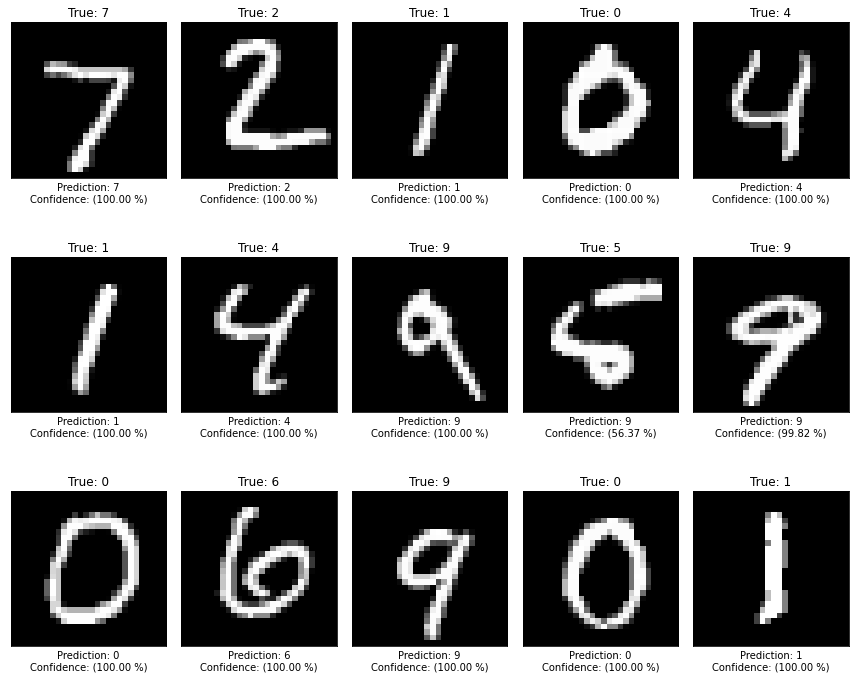

In [47]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

# **04. 모델 세부 설정**

In [48]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


## **4-1. 초기값 설정**

In [49]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [50]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [51]:
# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

## **4-2. 규제(Regularization)**

In [52]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_24',
 'trainable': True,
 'units': 256,
 'use_bias': True}

In [53]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


## **4-3. 드롭아웃(Dropout)**
- 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어 
- 노드의 일부 신호를 임의로 삭제하여 과대적합 방지
- 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들이 활용됨
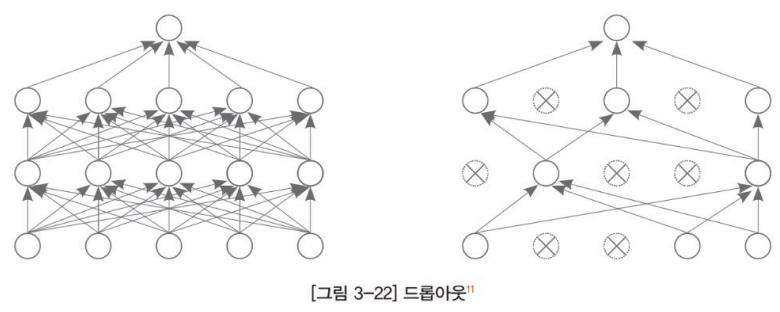

In [54]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

## **4-4. 배치 정규화(Batch Normalization)**
- 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화함
- 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있음

In [55]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

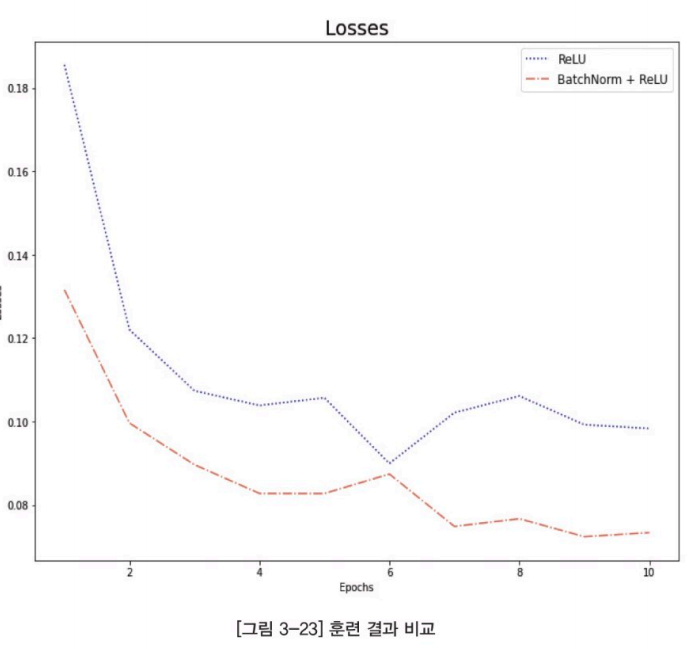

- 동일한 조건에서 10번의 epoch동안 model_a, model_b 두 모델을 훈련한 결과 
- 배치 정규화만 추가하였는데 손실은 이전 대비 더 안정적이고 빠르게 수렴함 

## **4-5. 활성화(activation) 함수**


In [57]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [58]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

- 총 3개의 모델을 동일한 조건으로 10번의 epoch 동안 훈련한 후 수렴 속도 확인
- model_a: Dense 레이어 + ReLU 활성화 함수
- model_b: Dense 레이어 + 배치 정규화
- model_c: Dense 레이어 + 배치 정규화 + LeakyReLU 활성화 함수

In [59]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2936 - accuracy: 0.9147 - val_loss: 0.1611 - val_accuracy: 0.9499
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1366 - accuracy: 0.9589 - val_loss: 0.1267 - val_accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0998 - accuracy: 0.9703 - val_loss: 0.1072 - val_accuracy: 0.9666
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0980 - val_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9797 - val_loss: 0.0840 - val_accuracy: 0.9747
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0553 - accuracy: 0.9823 - val_loss: 0.0955 - val_accuracy: 0.9707
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0826 - val_accuracy:

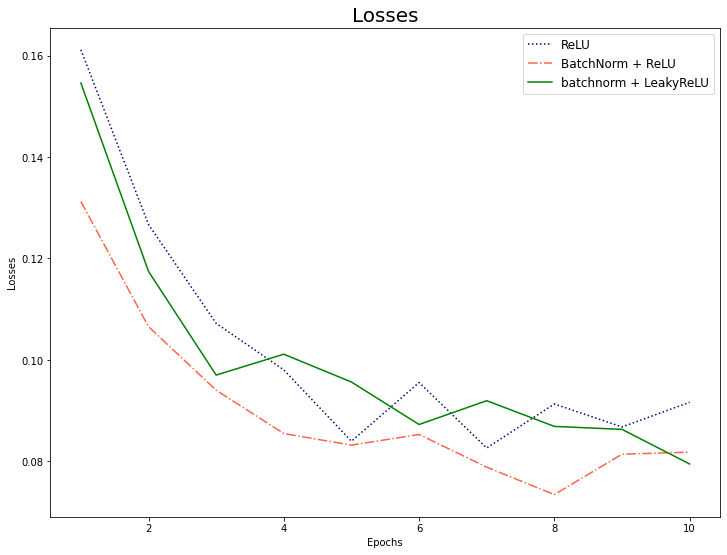

In [60]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()